Start by importing libraries

In [2]:
from astropy.io import fits
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from astropy.wcs import WCS

% matplotlib inline 

Read in fits data

In [3]:
files = '/home/tcox/data/HERA_data/2458042/KM_uvR_files/run_3/imgs/zen.2458042.48343.xx.HH.uvR.uvfits.msFinal.combined.img.fits'
fits_data = fits.open(files)

Collect information about the file

In [4]:
fits_info = fits_data[0].header

ax1        = fits_info['NAXIS1']
ax2        = fits_info['NAXIS2']
units      = fits_info['BUNIT']
c_ra       = fits_info['OBSRA']
c_dec      = fits_info['OBSDEC']
pix_size   = fits_info['CDELT2']
c_pix1     = fits_info['CRPIX1']
c_pix2     = fits_info['CRPIX2']

Setup the right ascension and declination of every pixel. Considering adding mesh grip, but it seems unnecessary

In [5]:
w = WCS(files)
i,j = w.all_world2pix(50.67412,-37.208200,0,0,0)[:2]

indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in parameterized keywords must not have leading zeroes. [astropy.wcs.wcs]
indices in param

Read the data into a variable

In [6]:
data = fits_data[0].data
data = np.flip(data[0][0],axis=0)

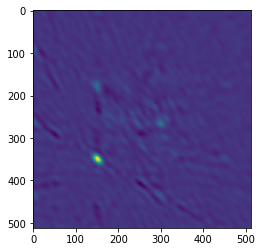

In [7]:
plt.imshow(data)

In [8]:
i = int(i)
j = int(ax2-j) # Accounting for flipping the data
data[j-5:j+5,i-5:i+5].max()

0.019544734

In [9]:
i,j

(148, 352)

In [8]:
from HERA_calibration_sources import add_fluxes

In [23]:
tb = add_fluxes(DEC_range=7.0, min_flux=7000.0)
tb = tb.drop([tb.index[8],tb.index[9]])

In [26]:
name_dict = {k: [] for k in tb['Name of Center']}
name_dict

{'TGSSADR J020012.1-305327': [],
 'TGSSADR J045514.2-300650': [],
 'TGSSADR J045826.4-300720': [],
 'TGSSADR J082126.4-301105': [],
 'TGSSADR J142155.5-310428': [],
 'TGSSADR J142529.1-295956': [],
 'TGSSADR J162555.4-310809': [],
 'TGSSADR J165956.9-305205': [],
 'TGSSADR J185710.6-301943': [],
 'TGSSADR J211810.6-301915': []}

In [27]:
name_dict['TGSSADR J020012.1-305327'].append(1)